# Activity Trackers

## Introduction

Exploration of simulated Data from a [study](https://pubmed.ncbi.nlm.nih.gov/29084709/#:~:text=The%20most%20important%20determinants%20are,related%20aspects%20of%20activity%20trackers)  in France, where over 900 volunteers received a Fitbit Zip (a clip-on activity tracker) and recorded their daily steps, distance and calories.

## Data cleaning

### Imports

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Import Data

In [2]:
df_steps = pd.read_csv('steps.csv', sep=";")
df_steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_survey = pd.read_csv('survey.csv')
df_survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


### Combine Data

In [4]:
df_combined = df_survey.merge(df_steps)
df_combined.info(verbose=True, show_counts=True)
df_combined.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 0 to 928
Data columns (total 337 columns):
 #    Column       Non-Null Count  Dtype  
---   ------       --------------  -----  
 0    id           929 non-null    int64  
 1    city         929 non-null    object 
 2    gender       929 non-null    object 
 3    age          929 non-null    object 
 4    hh_size      929 non-null    int64  
 5    education    929 non-null    int64  
 6    education_1  929 non-null    object 
 7    height       928 non-null    float64
 8    weight       927 non-null    float64
 9    20-6-2013    24 non-null     float64
 10   21-6-2013    243 non-null    float64
 11   22-6-2013    278 non-null    float64
 12   23-6-2013    296 non-null    float64
 13   24-6-2013    354 non-null    float64
 14   25-6-2013    353 non-null    float64
 15   26-6-2013    328 non-null    float64
 16   27-6-2013    380 non-null    float64
 17   28-6-2013    419 non-null    float64
 18   29-6-2013    302 non-null   

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Check impossible* values

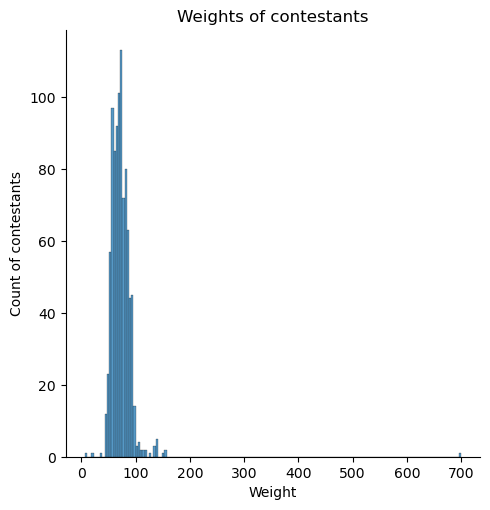

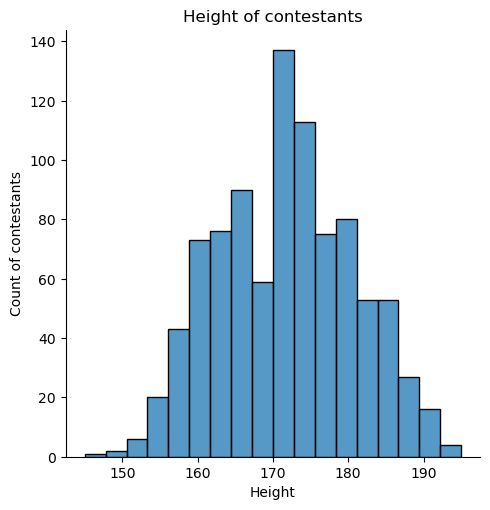

In [5]:
sns.displot(df_combined['weight'].dropna(), kde=False) 
plt.title('Weights of contestants')
plt.xlabel('Weight')
plt.ylabel('Count of contestants')
plt.show()

# print(df_combined['weight'].value_counts().sort_index())

sns.displot(df_combined['height'].dropna(), kde=False) 
plt.title('Height of contestants')
plt.xlabel('Height')
plt.ylabel('Count of contestants')
plt.show()

# print(df_combined['height'].value_counts().sort_index())


In [6]:
df_combined[(df_combined["weight"] < 45) | (df_combined["weight"] > 155)]

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
43,44,Lille,Female,35-44,4,4,Master or doctorate,156.0,700.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,103,Bordeaux,Female,25-34,2,2,Bachelor,157.0,37.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,390,Lille,Female,25-34,3,4,Vocational,156.0,6.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
840,841,Lille,Female,35-44,3,4,High school,158.0,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Remove impossible* values
<sub>*eventough nothing is impossible</sub>

I decided to drop the values below 20, even though 20 is already unlikely, but the BMI of 9 is technically [possible](https://www.ennonline.net/fex/15/limits).

In [7]:
df_combined = df_combined.drop(df_combined[(df_combined["weight"] < 20) | (df_combined["weight"] > 155)].index)

print(df_combined['weight'].value_counts().sort_index())


20.0     1
37.0     1
45.0     9
46.0     3
47.0     5
        ..
128.0    1
133.0    3
140.0    5
149.0    1
155.0    2
Name: weight, Length: 70, dtype: int64


### Mean steps

In [8]:
df_combined["mean_steps"] = df_combined.iloc[:, 10:].mean(axis=1)

df_combined.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


## Feature engineering: BMI

In [9]:
df_combined["BMI"] = df_combined["weight"] / (df_combined["height"]/100)**2

df_combined.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps,BMI
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212,30.930438
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313,23.765432
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730,25.617284
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000,25.249337
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630,21.872423


## Exploratory data analysis

##### An analysis of mean steps per participant

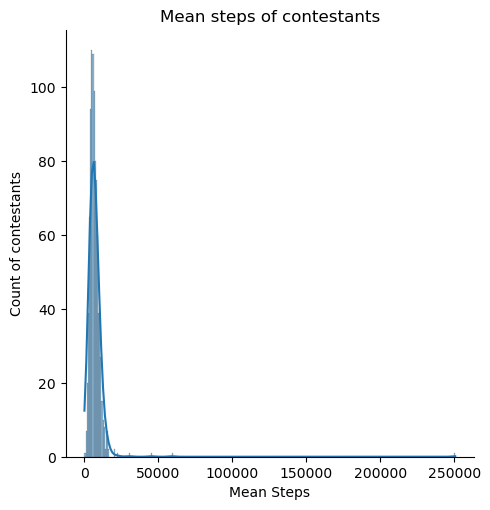

In [10]:
sns.displot(df_combined['mean_steps'].dropna(), kde=True) 
plt.title('Mean steps of contestants')
plt.xlabel('Mean Steps')
plt.ylabel('Count of contestants')
plt.show()

#### Clean Outlier

100000 Steps a day seem possible, it takes 15-16hours. Its unlikely that someone walks this over this time as the mean.

https://blog.fitbit.com/100000-steps/ <br/>
https://community.fitbit.com/t5/Get-Moving/How-do-people-average-50000-steps-per-day/td-p/556118



In [11]:
df_combined[(df_combined["mean_steps"] < 800) | (df_combined["mean_steps"] > 100000)]

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps,BMI
616,617,Lille,Male,25-34,1,1,Master or doctorate,176.0,62.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,20.015496
740,741,Lille,Female,<25,2,3,Master or doctorate,165.0,80.0,6060.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250638.25,29.384757


In [12]:

df_combined = df_combined.drop(df_combined[(df_combined["mean_steps"] < 800) | (df_combined["mean_steps"] > 100000)].index)



#### Analysis

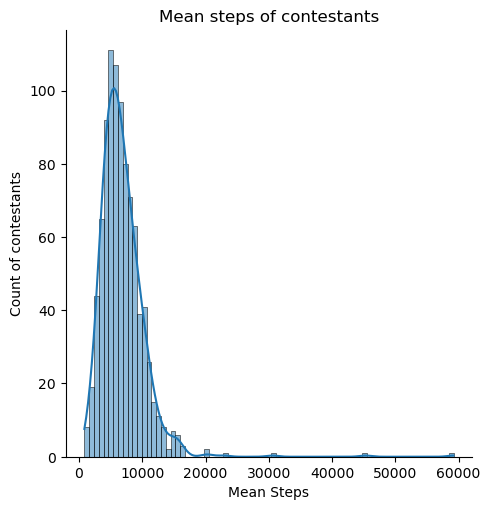

In [13]:
sns.displot(df_combined['mean_steps'].dropna(), kde=True) 
plt.title('Mean steps of contestants')
plt.xlabel('Mean Steps')
plt.ylabel('Count of contestants')
plt.show()

In [14]:
df_combined["mean_steps"].describe()

count      921.000000
mean      6826.993428
std       3715.248966
min        842.000000
25%       4636.000000
50%       6244.857143
75%       8355.887218
max      59209.301370
Name: mean_steps, dtype: float64

The skewness of the graph is slightly tilted to the right depending on where we remove the boundary for the outlier.

##### The relation of mean steps per participant with two categorical variables (e.g. gender, age, education)

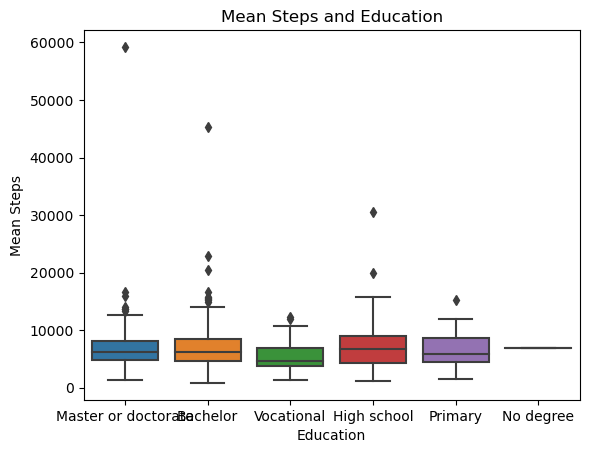

In [15]:
sns.boxplot(x='education_1', y='mean_steps', data=df_combined)
plt.xlabel('Education')
plt.ylabel('Mean Steps')
plt.title('Mean Steps and Education')
plt.show()

In the graphs we can see that Eductional as a factor does not have a big difference in terms of steps, but Vocational has made less steps than the other degrees.

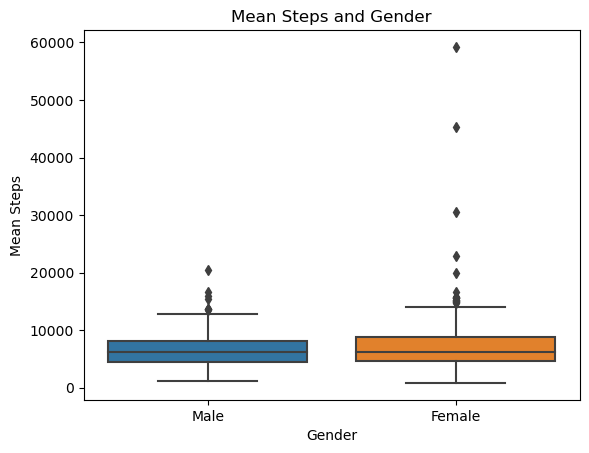

In [16]:
sns.boxplot(x='gender', y='mean_steps', data=df_combined)
plt.xlabel('Gender')
plt.ylabel('Mean Steps')
plt.title('Mean Steps and Gender')
plt.show()

The meansteps between women and men are equalized, but there are greater differences among women.

### Corelations

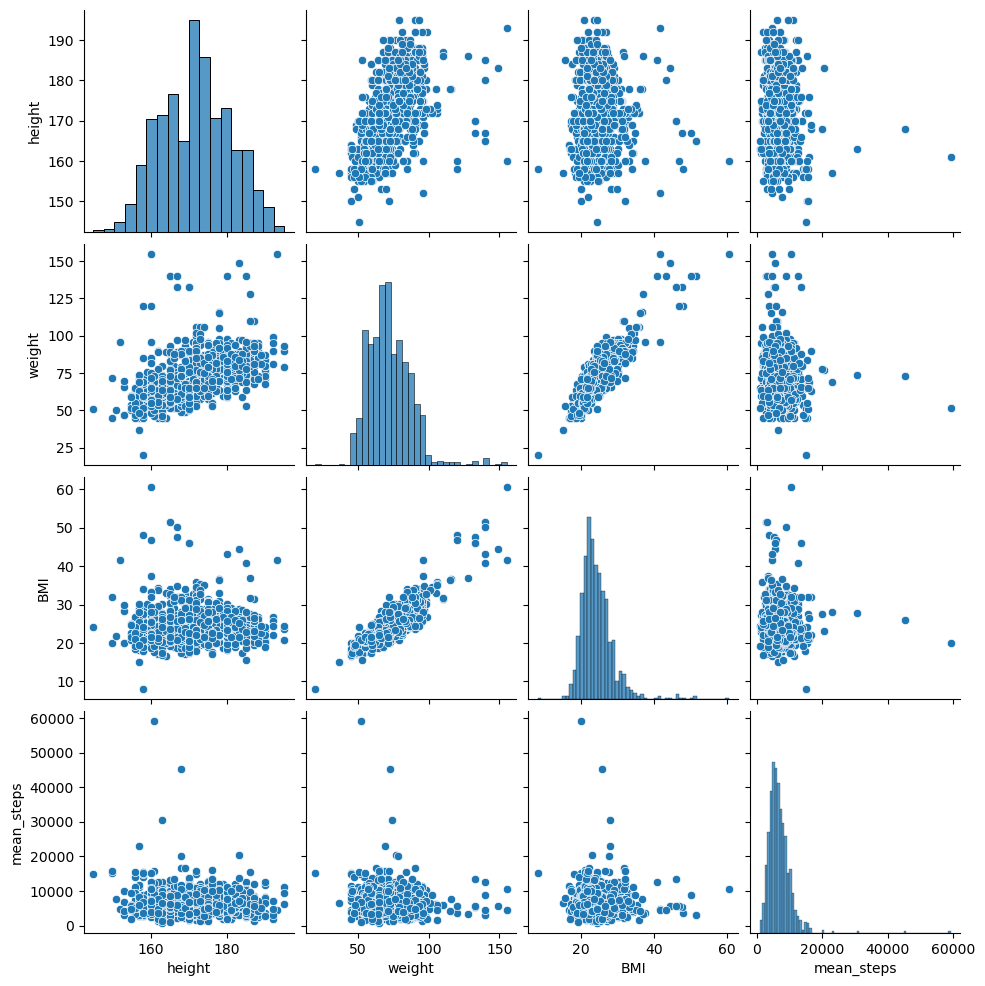

In [17]:
sns.pairplot(df_combined[['height', 'weight', 'BMI', 'mean_steps']])
plt.show()

              height    weight       BMI  mean_steps
height      1.000000  0.512952  0.030606   -0.092415
weight      0.512952  1.000000  0.868731   -0.077122
BMI         0.030606  0.868731  1.000000   -0.035763
mean_steps -0.092415 -0.077122 -0.035763    1.000000


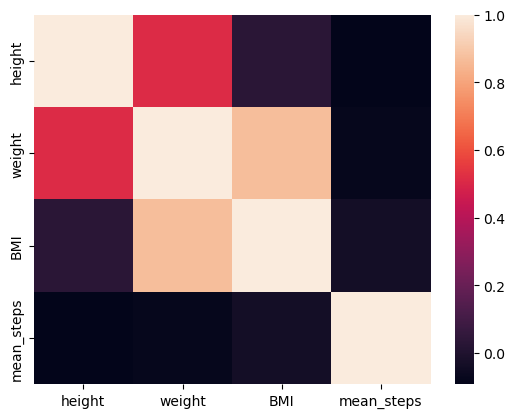

In [21]:
corr = df_combined[['height', 'weight', 'BMI', 'mean_steps']].corr() #I'm leaving out the corrected variables (divided by 1 million)
print(corr.head())

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()

The correlation matrices show almost no correlation between the mean steps and the height and weight. The BMI has a slightly better correlation, but still much too weak. The correlations between BMI and height are also surprisingly low, while weight and BMI have a strong correlation and weight and height have a moderate correlation.

## Predictive model
- Explain linear regression in your own words <br/>
- Create dummy variables for the categorical variables  <br/>
- Fit a linear regression model to predict the mean steps per participant, using the training data. You can include all variables (easy), or you can try to find the combination that gives you the best fit (harder).

## Evaluation

- Evaluate the model on the test data: <br/>
    - Predictive power of the model (R2, RMSE) <br/>
    - Investigate the residuals <br/>
- Describe and interpret the results <br/>

## Conclusion